In [45]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
plt.style.use('seaborn')
healthspent = requests.get('https://www.theglobaleconomy.com/rankings/health_spending_per_capita/')
HS = bs(healthspent.content, 'lxml')
table = HS.find("table", {"class":"sortable"})
HSpcap = pd.read_html(str(table))[0]
HSpcap

,Countries,"Health spending per capita, 2019",Global rank,Available data
0,USA,10921.01,1,2000 - 2019
1,Switzerland,9666.34,2,2000 - 2019
2,Norway,8007.40,3,2000 - 2019
3,Iceland,6274.96,4,2000 - 2019
4,Luxembourg,6220.74,5,2000 - 2019
...,...,...,...,...
176,Ethiopia,26.74,177,2000 - 2019
177,Eritrea,25.27,178,2000 - 2019
178,Burundi,20.57,179,2000 - 2019
179,DR Congo,20.57,180,2000 - 2019


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
fs22_sales.set_index('Sales Region Country')
fs22grouped = fs22_sales.groupby("Sales Region Country").sum()
fs22sorted = fs22grouped.sort_values("Premium (converted)", ascending=False)
fs22filtered = fs22sorted.drop(columns=["Premium"])
fs22renamed = fs22filtered.rename(columns={'Won': 'Policies won', 'Premium (converted)': 'Total Premium (€)'})
Aver_premium = fs22renamed['Total Premium (€)'] / fs22renamed['Policies won']
fs22newcolumn = fs22renamed.assign(Prem_average=Aver_premium)
display(fs22newcolumn.dtypes)
fs22complete = fs22newcolumn.astype({"Total Premium (€)":'int', "Prem_average":'int'})
fs22complete.head(10)

Policies won           int64
Total Premium (€)    float64
Prem_average         float64
dtype: object

,Policies won,Total Premium (€),Prem_average
Sales Region Country,,,
UK,57,403130,7072
Germany,93,397450,4273
Singapore,36,359221,9978
France,94,240088,2554
Spain,62,197620,3187
USA,19,197543,10397
Thailand,29,166308,5734
China,21,131817,6277
Belgium,120,118159,984


In [56]:
SalesQ1_Q2 = fs22complete.merge(HSpcap, left_on='Sales Region Country', right_on='Countries')
Q1_Q2index = SalesQ1_Q2.set_index('Countries').head(10)
Q1_Q2sorted = Q1_Q2index.sort_values("Total Premium (€)", ascending=False)
Q1_Q2drop = Q1_Q2sorted.drop(columns=["Available data"]).head(10)
Q1_Q2drop.rename(columns={'Health spending per capita, 2019': 'Health spend p/c (2019)'})

,Policies won,Total Premium (€),Prem_average,Health spend p/c (2019),Global rank
Countries,,,,,
UK,57,403130,7072,4312.89,18
Germany,93,397450,4273,5440.25,8
Singapore,36,359221,9978,2632.71,27
France,94,240088,2554,4491.74,15
Spain,62,197620,3187,2711.19,26
USA,19,197543,10397,10921.01,1
Thailand,29,166308,5734,296.17,99
China,21,131817,6277,535.13,74
Belgium,120,118159,984,4960.39,14


In [81]:
# I'm creating a data frame with the top 10 performing countries (best sales revenue) and inclduing the top 10 expat destination countries, so I can later analyse possible opportunities.

Top_Countries = pd.DataFrame({'country':    ['Mexico', 'Indonesia', 'Taiwan', 'Portugal', 'Spain', 'UAE', 'Vietnam', 'Thailand', 'Australia', 'Singapore', 'USA', 'Russia', 'Belgium', 'France', 'China', 'UK', 'Germany', 'Italy'],
         'Expat_ranking':    ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '14', '17', '29', '31', '33', '37', '42', '44']})

Top_Countries

,country,Expat_ranking
0,Mexico,01
1,Indonesia,02
2,Taiwan,03
3,Portugal,04
4,Spain,05
5,UAE,06
6,Vietnam,07
7,Thailand,08
8,Australia,09
9,Singapore,10


In [82]:
# I want to see how many policies we sold (Policies won) and what was the total premium for each of the top 10 expat destinations.

Q1_Q2ERadd = fs22complete.merge(Top_Countries, left_on='Sales Region Country', right_on='country') 
Q1_Q2sorted = Q1_Q2ERadd.sort_values("Expat_ranking", ascending=True)
Q1_Q2renamed = Q1_Q2sorted.rename(columns={'country': 'Countries'})
Q1_Q2renamed.set_index('Countries').head(10)

,Policies won,Total Premium (€),Prem_average,Expat_ranking
Countries,,,,
Mexico,14,86679,6191,01
Indonesia,29,98085,3382,02
Taiwan,5,14008,2801,03
Portugal,26,103706,3988,04
Spain,62,197620,3187,05
UAE,5,51843,10368,06
Vietnam,7,42448,6064,07
Thailand,29,166308,5734,08
Australia,6,8857,1476,09


<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

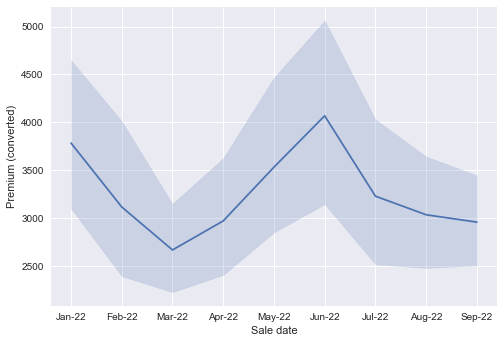

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.lineplot(data=fs22_sales, x='Sale date', y='Premium (converted)')

<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

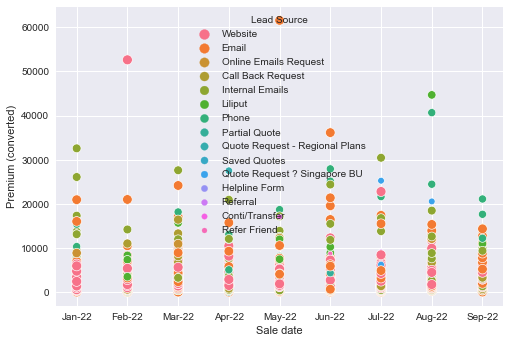

In [76]:
# I want to see which source is generating more leads so we can maximize future opportunities.

fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.scatterplot(x='Sale date',y='Premium (converted)', data=fs22_sales, hue='Lead Source', size='Lead Source')

<AxesSubplot:xlabel='Sale date', ylabel='Premium (converted)'>

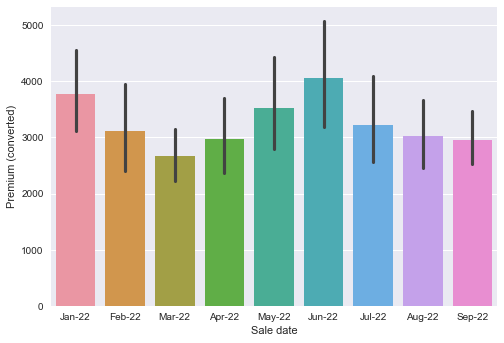

In [24]:
# General overview of total premium collected from Q1-Q3.

fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.barplot(data=fs22_sales, y='Premium (converted)', x='Sale date')

<AxesSubplot:xlabel='country'>

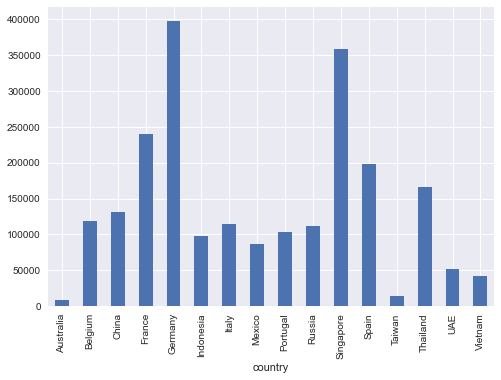

In [65]:
SalesQ1_Q2 = fs22complete.merge(Top_Countries, left_on='Sales Region Country', right_on='country')
SalesQ1_Q2.sort_values("Expat_ranking", ascending=True)
SalesQ1_Q2.groupby('country').mean()['Total Premium (€)'].plot.bar()

In [87]:
# I want to see how many policies we sold (Policies won) and what was the total premium for each of the top 10 expat destinations.

Q1_Q2ERadd = fs22complete.merge(Top_Countries, left_on='Sales Region Country', right_on='country') 
Q1_Q2sorted = Q1_Q2ERadd.sort_values("Total Premium (€)", ascending=False)
Q1_Q2renamed = Q1_Q2sorted.rename(columns={'country': 'Countries'})
Q1_Q3topsales = Q1_Q2renamed.set_index('Countries').head(10)
Q1_Q3topsales

,Policies won,Total Premium (€),Prem_average,Expat_ranking
Countries,,,,
UK,57,403130,7072,37
Germany,93,397450,4273,42
Singapore,36,359221,9978,10
France,94,240088,2554,31
Spain,62,197620,3187,05
USA,19,197543,10397,14
Thailand,29,166308,5734,08
China,21,131817,6277,33
Belgium,120,118159,984,29


<AxesSubplot:xlabel='Policies won', ylabel='Total Premium (€)'>

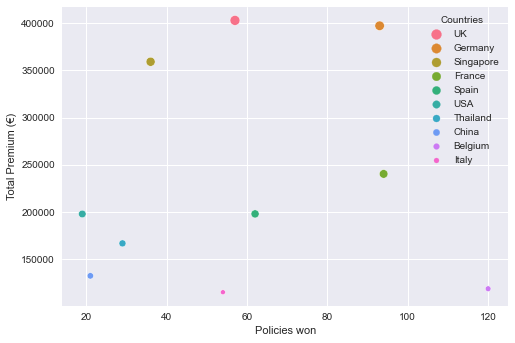

In [ ]:
sns.scatterplot(x='Policies won',y='Total Premium (€)', data=Q1_Q3topsales, hue='Countries', size='Countries')